<a href="https://colab.research.google.com/github/MMoronto/pytorch_exercises/blob/master/custom_data_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision

# Note: Required to have PyTorch > 1.11.0 & torchvision > 0.12.0 for Food101 dataset
assert int(torch.__version__.split(".")[1]) >= 11
assert int(torchvision.__version__.split(".")[1]) >= 11

import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Setup data directory
import pathlib
data_dir = pathlib.Path("../data")

In [2]:
# Get training data
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              # transform=transforms.ToTensor(),
                              download=True)
# Get testing data
test_data = datasets.Food101(root=data_dir,
                              split="test",
                              # transform=transforms.ToTensor(),
                              download=True)

  0%|          | 0/4996278331 [00:00<?, ?it/s]

Extracting ../data/food-101.tar.gz to ../data


In [3]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: ../data
    split=train

In [4]:
class_names = train_data.classes
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

churros


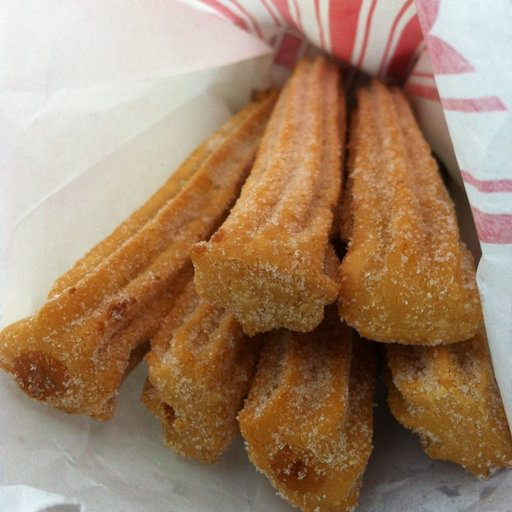

In [5]:
# View first sample (PIL image format)
print(class_names[train_data[0][1]])
train_data[1][0]

In [6]:
# Get random 10% of training images
import random 

# Setup data paths 
data_path = data_dir / "food-101" / "images" 
target_classes = ["churros", "baklava", "beignets"]

# Change amount of data to get (e.g. 0.1 = random 10%, 0.2 = random 20%)
amount_to_get = 0.2

# Create function to separate a random amount of data
def get_subset(image_path=data_path,
               data_splits=["train", "test"],
               target_classes=["churros", "baklava", "beignets"],
               amount=0.1,
               seed=42):
    random.seed(42)
    label_splits = {}

    # Get labels
    for data_split in data_splits:
        print(f"[INFO] Creating image split for: {data_split}...")
        label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
        with open(label_path, "r") as f:
          labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

        # Get random subset of target classes image ID's
        number_to_sample = round(amount * len(labels))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(labels, k=number_to_sample)

        # Apply full paths
        image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        label_splits[data_split] = image_paths
    return label_splits

label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:10]

[INFO] Creating image split for: train...
[INFO] Getting random subset of 450 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 150 images for test...


[PosixPath('../data/food-101/images/baklava/3140803.jpg'),
 PosixPath('../data/food-101/images/baklava/1451812.jpg'),
 PosixPath('../data/food-101/images/beignets/2835963.jpg'),
 PosixPath('../data/food-101/images/beignets/2148269.jpg'),
 PosixPath('../data/food-101/images/beignets/1631091.jpg'),
 PosixPath('../data/food-101/images/baklava/3678786.jpg'),
 PosixPath('../data/food-101/images/baklava/2929554.jpg'),
 PosixPath('../data/food-101/images/churros/944058.jpg'),
 PosixPath('../data/food-101/images/baklava/2581678.jpg'),
 PosixPath('../data/food-101/images/churros/1977745.jpg')]

In [7]:
# Create target directory path
target_dir_name = f"../data/churros_baklava_beignets_{str(int(amount_to_get*100))}_percent"
print(f"Creating_directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories 
target_dir.mkdir(parents=True, exist_ok=True) 

Creating_directory: '../data/churros_baklava_beignets_20_percent'


In [8]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying ../data/food-101/images/baklava/3140803.jpg to ../data/churros_baklava_beignets_20_percent/train/baklava/3140803.jpg...
[INFO] Copying ../data/food-101/images/baklava/1451812.jpg to ../data/churros_baklava_beignets_20_percent/train/baklava/1451812.jpg...
[INFO] Copying ../data/food-101/images/beignets/2835963.jpg to ../data/churros_baklava_beignets_20_percent/train/beignets/2835963.jpg...
[INFO] Copying ../data/food-101/images/beignets/2148269.jpg to ../data/churros_baklava_beignets_20_percent/train/beignets/2148269.jpg...
[INFO] Copying ../data/food-101/images/beignets/1631091.jpg to ../data/churros_baklava_beignets_20_percent/train/beignets/1631091.jpg...
[INFO] Copying ../data/food-101/images/baklava/3678786.jpg to ../data/churros_baklava_beignets_20_percent/train/baklava/3678786.jpg...
[INFO] Copying ../data/food-101/images/baklava/2929554.jpg to ../data/churros_baklava_beignets_20_percent/train/baklava/2929554.jpg...
[INFO] Copying ../data/food-101/images/churros/94

In [9]:
# Check lengths of directories
def walk_through_dir(dir_path):

  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(target_dir)

There are 2 directories and 0 images in '../data/churros_baklava_beignets_20_percent'.
There are 3 directories and 0 images in '../data/churros_baklava_beignets_20_percent/test'.
There are 0 directories and 46 images in '../data/churros_baklava_beignets_20_percent/test/churros'.
There are 0 directories and 46 images in '../data/churros_baklava_beignets_20_percent/test/baklava'.
There are 0 directories and 58 images in '../data/churros_baklava_beignets_20_percent/test/beignets'.
There are 3 directories and 0 images in '../data/churros_baklava_beignets_20_percent/train'.
There are 0 directories and 150 images in '../data/churros_baklava_beignets_20_percent/train/churros'.
There are 0 directories and 154 images in '../data/churros_baklava_beignets_20_percent/train/baklava'.
There are 0 directories and 146 images in '../data/churros_baklava_beignets_20_percent/train/beignets'.


In [10]:
# Zip churros_baklava_beignets images
zip_file_name = data_dir / f"churros_baklava_beignets_{str(int(amount_to_get*100))}_percent"
shutil.make_archive(zip_file_name,
                    format="zip",
                    root_dir=target_dir)

'/data/churros_baklava_beignets_20_percent.zip'

In [11]:
!ls -la ../data/

total 4907396
drwxr-xr-x 4 root root       4096 Feb 21 21:32 .
drwxr-xr-x 1 root root       4096 Feb 21 21:26 ..
drwxr-xr-x 4 root root       4096 Feb 21 21:32 churros_baklava_beignets_20_percent
-rw-r--r-- 1 root root   28869356 Feb 21 21:32 churros_baklava_beignets_20_percent.zip
drwxr-xr-x 4 3156  320       4096 Jul  9  2014 food-101
-rw-r--r-- 1 root root 4996278331 Feb 21 21:30 food-101.tar.gz


In [12]:
!mkdir -p churros_baklava_beignets
!unzip ../data/churros_baklava_beignets_20_percent.zip -d churros_baklava_beignets

Archive:  ../data/churros_baklava_beignets_20_percent.zip
   creating: churros_baklava_beignets/test/
   creating: churros_baklava_beignets/train/
   creating: churros_baklava_beignets/test/baklava/
   creating: churros_baklava_beignets/test/beignets/
   creating: churros_baklava_beignets/test/churros/
  inflating: churros_baklava_beignets/test/churros/2708222.jpg  
  inflating: churros_baklava_beignets/test/churros/2623176.jpg  
  inflating: churros_baklava_beignets/test/churros/625607.jpg  
  inflating: churros_baklava_beignets/test/churros/2807096.jpg  
  inflating: churros_baklava_beignets/test/churros/1503591.jpg  
  inflating: churros_baklava_beignets/test/churros/1213663.jpg  
  inflating: churros_baklava_beignets/test/churros/275341.jpg  
  inflating: churros_baklava_beignets/test/churros/1420399.jpg  
  inflating: churros_baklava_beignets/test/churros/2146131.jpg  
  inflating: churros_baklava_beignets/test/churros/3417372.jpg  
  inflating: churros_baklava_beignets/test/churr

In [13]:
!ls ../data

churros_baklava_beignets_20_percent	 food-101
churros_baklava_beignets_20_percent.zip  food-101.tar.gz


In [14]:
walk_through_dir("churros_baklava_beignets")

There are 2 directories and 0 images in 'churros_baklava_beignets'.
There are 3 directories and 0 images in 'churros_baklava_beignets/test'.
There are 0 directories and 46 images in 'churros_baklava_beignets/test/churros'.
There are 0 directories and 46 images in 'churros_baklava_beignets/test/baklava'.
There are 0 directories and 58 images in 'churros_baklava_beignets/test/beignets'.
There are 3 directories and 0 images in 'churros_baklava_beignets/train'.
There are 0 directories and 150 images in 'churros_baklava_beignets/train/churros'.
There are 0 directories and 154 images in 'churros_baklava_beignets/train/baklava'.
There are 0 directories and 146 images in 'churros_baklava_beignets/train/beignets'.


In [15]:
!ls

churros_baklava_beignets  sample_data


##0. Import PyTorch and set up device-agnostic code

In [16]:
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
torch.__version__

'1.13.1+cu116'

In [17]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

##1. Get data

In [20]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "churros_baklava_beignets"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download churros, baklava, beignets data
    with open(data_path / "churros_baklava_beignets.zip", "wb") as f:
        request = requests.get("https://github.com/MMoronto/pytorch_exercises/content/data/churros_baklava_beignets.zip")
        print("Downloading churros, baklava, beignets data...")
        f.write(request.content)

    # Unzip churros, baklava, beignets data
    with zipfile.ZipFile(data_path / "churros_baklava_beignets.zip", "r") as zip_ref:
        print("Unzipping churros, baklava, beignets data...") 
        zip_ref.extractall(image_path)

data/churros_baklava_beignets directory exists.


##2. Prepare data

In [21]:
import os
def walk_through_dir(dir_path):

  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [22]:
walk_through_dir(image_path)

There are 0 directories and 0 images in 'data/churros_baklava_beignets'.


In [23]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/churros_baklava_beignets/train'),
 PosixPath('data/churros_baklava_beignets/test'))

Random image path: data/churros_baklava_beignets/test/beignets/3619154.jpg
Image class: beignets
Image height: 512
Image width: 512


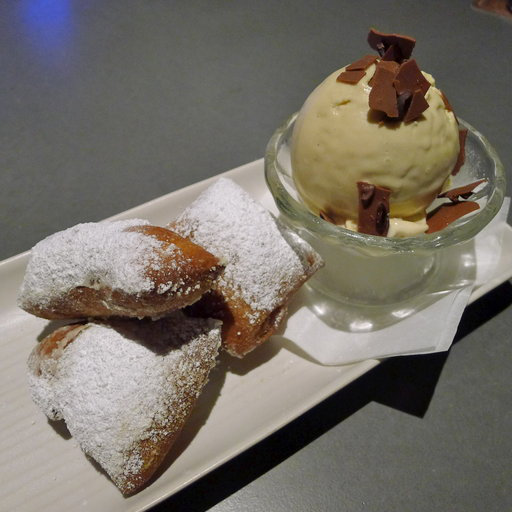

In [27]:
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the same name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4, Open Image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img